In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from config import rmax , aplha , beta


class Sensor:
    def __init__(self, robot_position, map_matrix):
        """Initialize sensors.
        
        Params
        ======
            robot_position (tuple): [y_robot, x_robot, theta_robot]
            map_matrix (numpy array): matrix representing the map
        """
        self.fov = np.pi
        self.angle_step = 0.008
        self.meas_phi = np.arange(0, 2*self.fov, self.angle_step)
        self.rmax = rmax
        self.robot_position = robot_position
        self.map_matrix = map_matrix
        self.map_height, self.map_width = map_matrix.shape
    
    def get_LIDAR_measurement(self):
        """Simulate LIDAR measurement.
        
        Returns
        =======
            (numpy array): array of range measurements
        """
        meas_r = rmax * np.ones(self.meas_phi.shape)

        # Vectorized computation of cell coordinates
        r_values = np.arange(2, rmax)
        print(r_values.shape)
        xi = self.robot_position[1] + np.outer(r_values, np.sin(self.robot_position[2] + self.meas_phi)).astype(int)
        print(xi.shape)
        yi = self.robot_position[0] + np.outer(r_values, np.cos(self.robot_position[2] + self.meas_phi)).astype(int)

        # Mask for valid coordinates
        valid_mask = (xi >= 0) & (xi < self.map_width ) & (yi >= 0) & (yi < self.map_height)

        # Map look-up
        for i in range(len(self.meas_phi)):
            valid_cells = valid_mask[:, i]
            xi_valid = xi[valid_cells, i]
            yi_valid = yi[valid_cells, i]

            # Find the first occupied cell or out-of-bound
            occupied_cells = (self.map_matrix[yi_valid, xi_valid] == 1)
            if occupied_cells.any():
                meas_r[i] = r_values[valid_cells][occupied_cells.argmax()]
            else:
                meas_r[i] = r_values[valid_cells][-1] if valid_cells.any() else rmax


        import matplotlib.pyplot as plt 
        # x_plot = self.robot_position[1] + np.outer(meas_r, np.cos(self.robot_position[2] + self.meas_phi)).astype(int)
        # y_plot = self.robot_position[0] + np.outer(meas_r, np.sin(self.robot_position[2] + self.meas_phi)).astype(int)
        # plt.figure(figsize=(5, 5))
        x_plot = []
        y_plot = []
        for i in range(len(self.meas_phi)):
            x_plot.append(self.robot_position[1] + meas_r[i]*np.cos(self.robot_position[2] + self.meas_phi[i]))
            y_plot.append(self.robot_position[0] + meas_r[i]*np.sin(self.robot_position[2] + self.meas_phi[i]))
        plt.imshow(np.subtract(1,map_matrix), cmap='gray', vmin=0, vmax=1,origin='lower')
        plt.plot(robot_position[1],robot_position[0],'o',color="red",markersize=1)
        plt.plot(x_plot,y_plot,'o',color="blue",markersize=1)
        plt.show()

        return meas_r


from map_generator import Map_Generator 
generator = Map_Generator(42)
map_matrix = generator.ref_map()


robot_position = [25,20,0]

LIDAR = Sensor(robot_position,map_matrix)
meas_r = LIDAR.get_LIDAR_measurement()


x_plot =[]
y_plot = [] 
meas_phi = np.arange(0,2*np.pi,0.0001)
for i in range(len(meas_r)):
    x_plot.append(robot_position[1]+meas_r[i]*np.cos(meas_phi[i]))
    y_plot.append(robot_position[0]+meas_r[i]*np.sin(meas_phi[i]))

import matplotlib.pyplot as plt 
plt.figure(figsize=(5, 5))
plt.imshow(np.subtract(1,map_matrix), cmap='gray', vmin=0, vmax=1,origin='lower')
plt.plot(robot_position[1],robot_position[0],'o',color="red",markersize=1)
plt.plot(y_plot,x_plot,'o',color="blue",markersize=1)
plt.show()

In [3]:
from maze_generator import Map_Generator 
generator = Map_Generator(42)
map_matrix = generator.ref_map()
map_matrix[10,25]

import numpy as np 
import matplotlib.pyplot as plt
from config import rmax , aplha , beta

0.0
phi -3.141592653589793
degree -180.0
(9, 18)
0.0


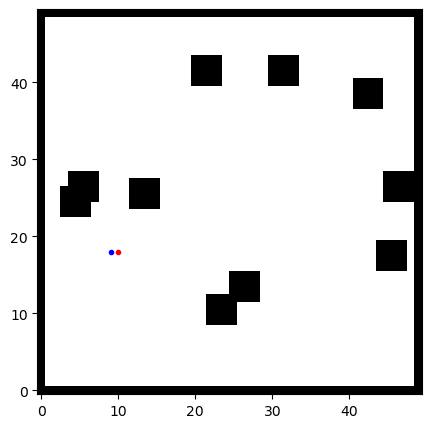

phi -3.141592653589793
degree -180.0
(8, 18)
0.0


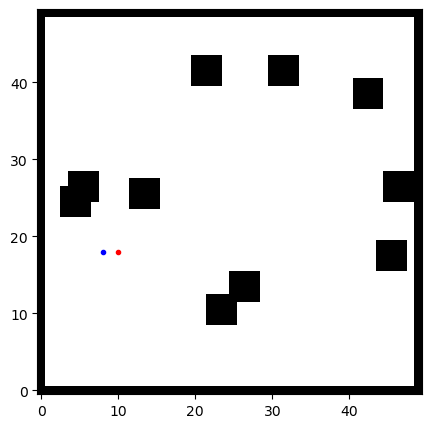

phi -3.141592653589793
degree -180.0
(7, 18)
0.0


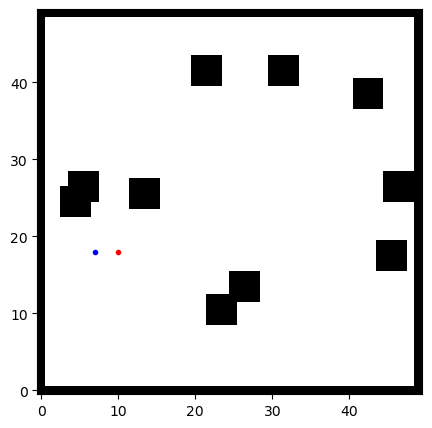

phi -3.141592653589793
degree -180.0
(6, 18)
0.0


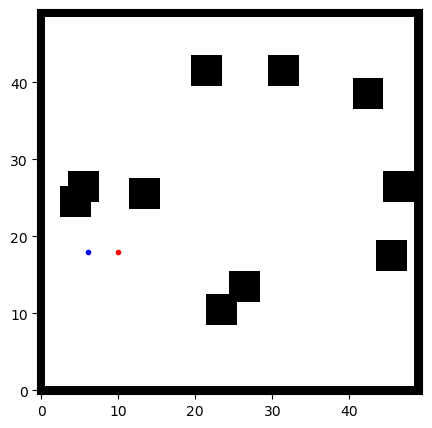

phi -3.141592653589793
degree -180.0
(5, 18)
0.0


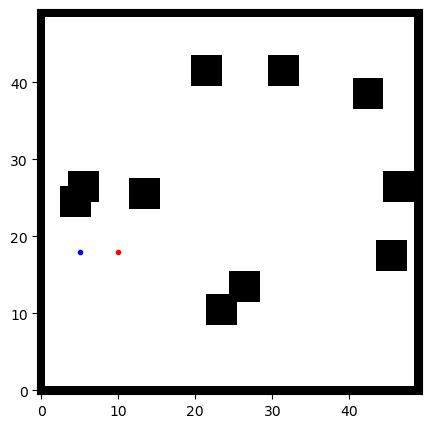

phi -3.141592653589793
degree -180.0
(4, 18)
0.0


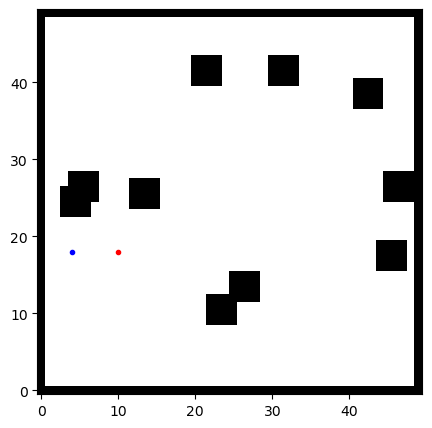

phi -3.141592653589793
degree -180.0
(3, 18)
0.0


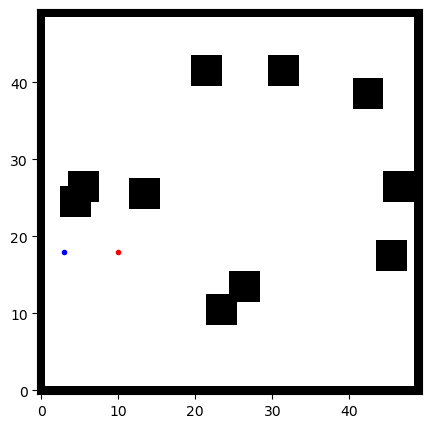

phi -2.641592653589793
degree -151.35211024345884
(10, 18)
0.0


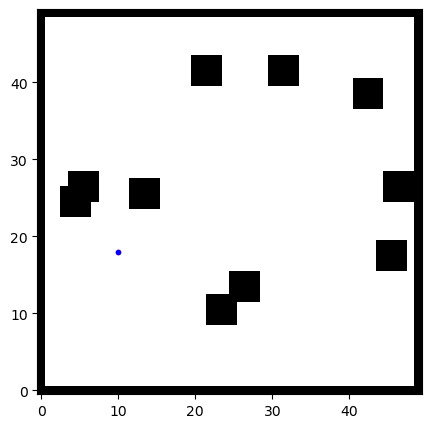

phi -2.641592653589793
degree -151.35211024345884
(9, 18)
0.0


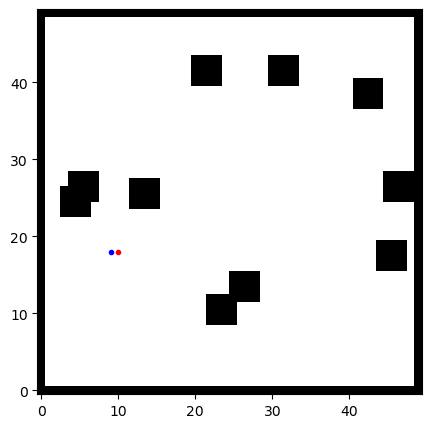

phi -2.641592653589793
degree -151.35211024345884
(8, 17)
0.0


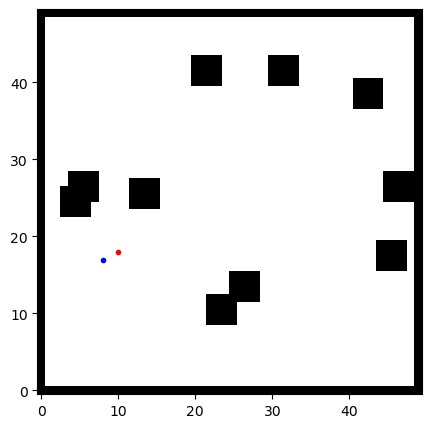

phi -2.641592653589793
degree -151.35211024345884
(7, 17)
0.0


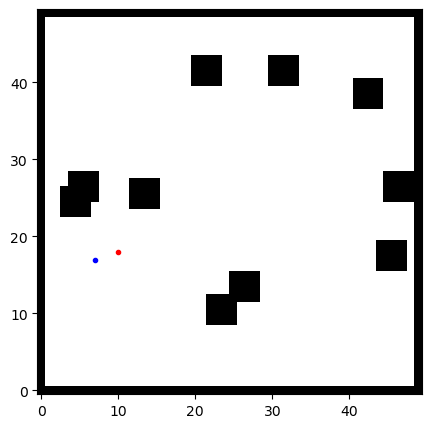

phi -2.641592653589793
degree -151.35211024345884
(6, 16)
0.0


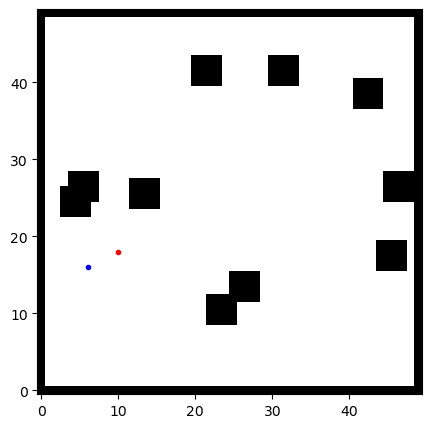

phi -2.641592653589793
degree -151.35211024345884
(5, 16)
0.0


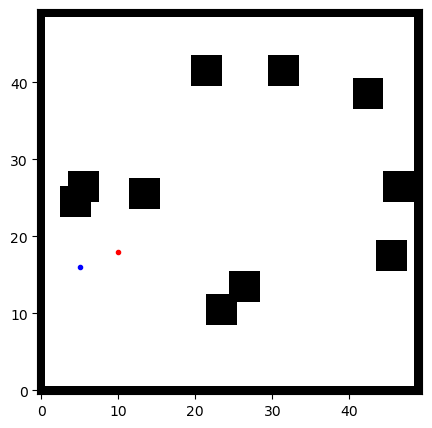

phi -2.641592653589793
degree -151.35211024345884
(4, 15)
0.0


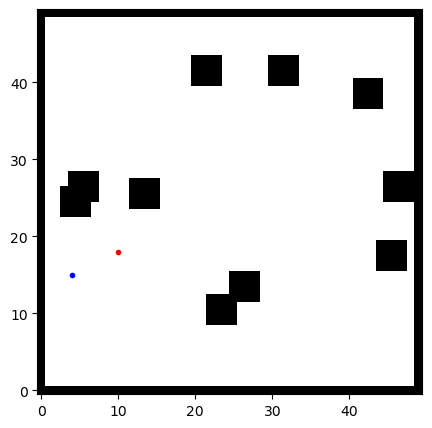

phi -2.141592653589793
degree -122.70422048691768
(10, 18)
0.0


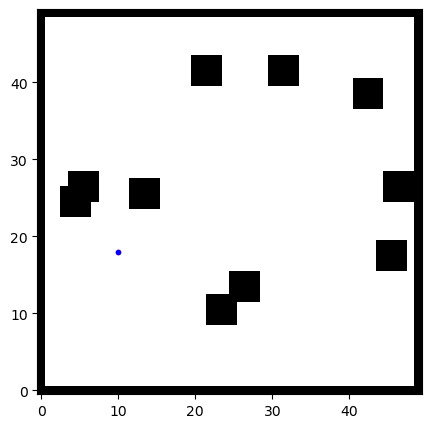

phi -2.141592653589793
degree -122.70422048691768
(9, 17)
0.0


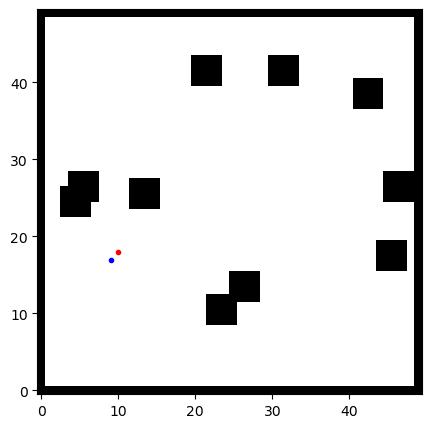

phi -2.141592653589793
degree -122.70422048691768
(9, 16)
0.0


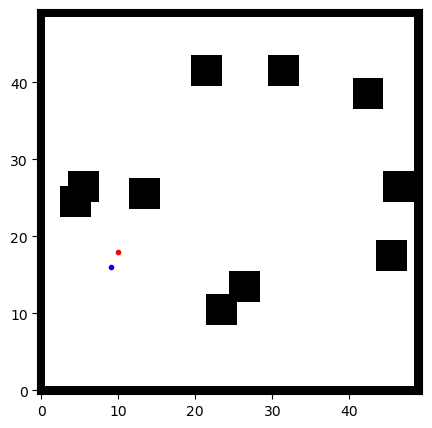

phi -2.141592653589793
degree -122.70422048691768
(8, 15)
0.0


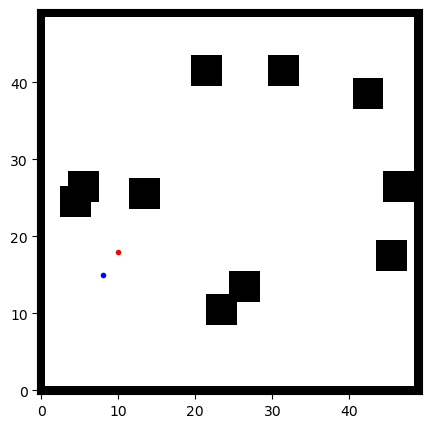

phi -2.141592653589793
degree -122.70422048691768
(8, 14)
0.0


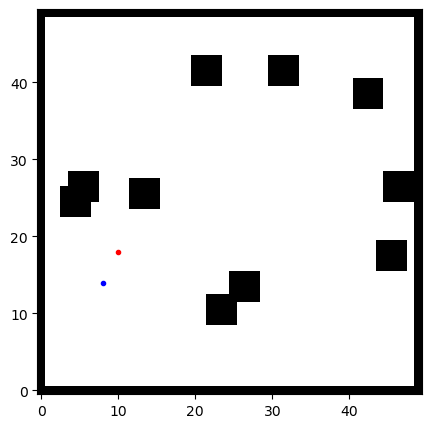

phi -2.141592653589793
degree -122.70422048691768
(7, 13)
0.0


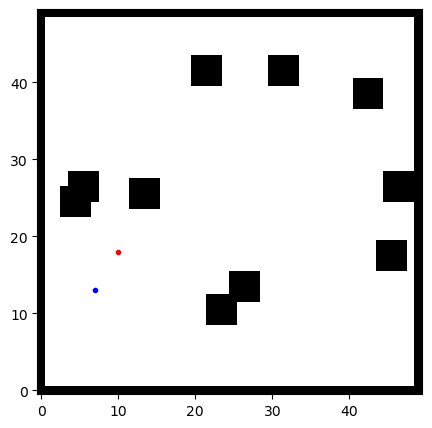

phi -2.141592653589793
degree -122.70422048691768
(7, 13)
0.0


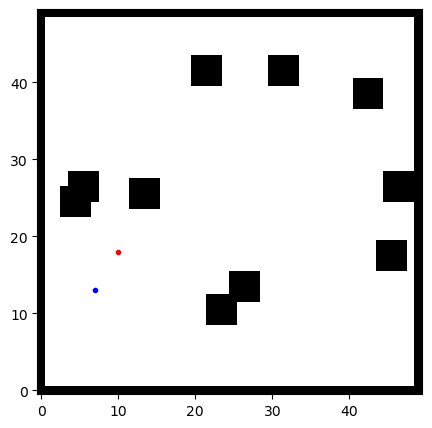

phi -1.6415926535897931
degree -94.05633073037652
(10, 18)
0.0


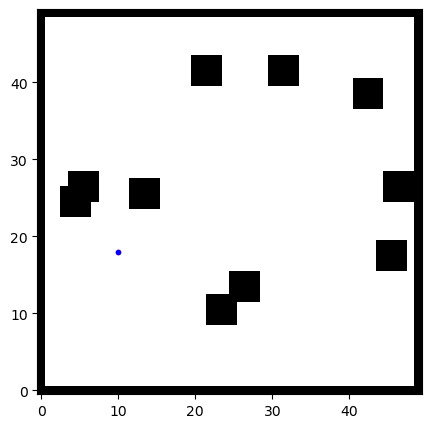

phi -1.6415926535897931
degree -94.05633073037652
(10, 17)
0.0


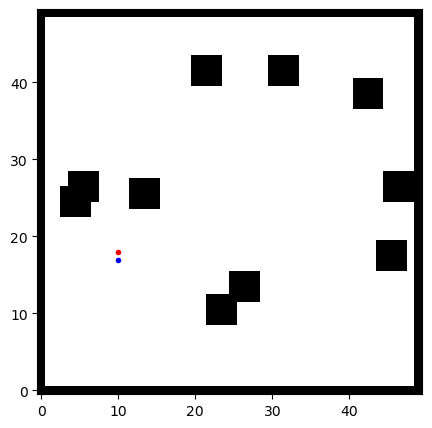

phi -1.6415926535897931
degree -94.05633073037652
(10, 16)
0.0


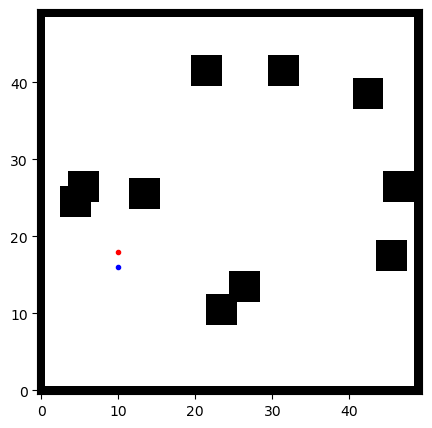

phi -1.6415926535897931
degree -94.05633073037652
(10, 15)
0.0


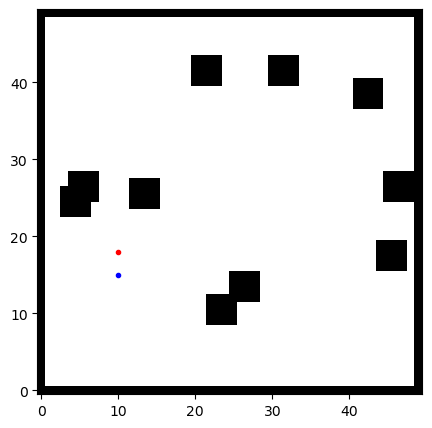

phi -1.6415926535897931
degree -94.05633073037652
(10, 14)
0.0


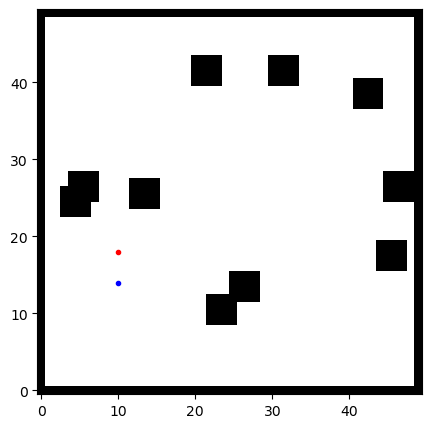

phi -1.6415926535897931
degree -94.05633073037652
(10, 13)
0.0


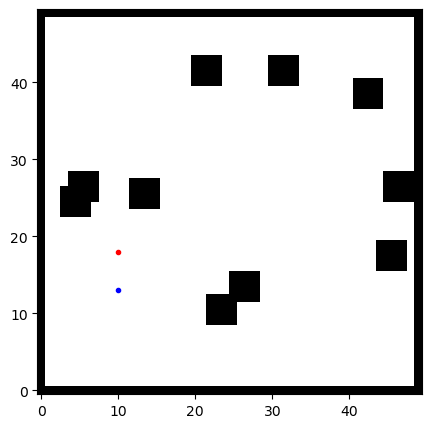

phi -1.6415926535897931
degree -94.05633073037652
(10, 12)
0.0


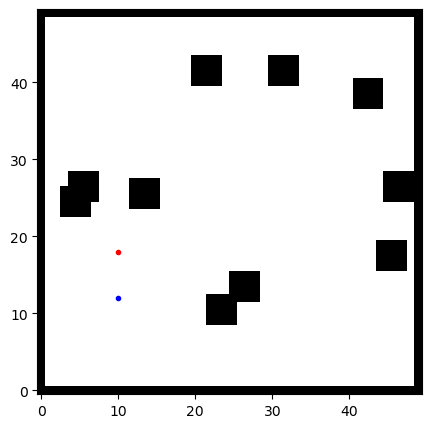

phi -1.1415926535897931
degree -65.40844097383535
(10, 18)
0.0


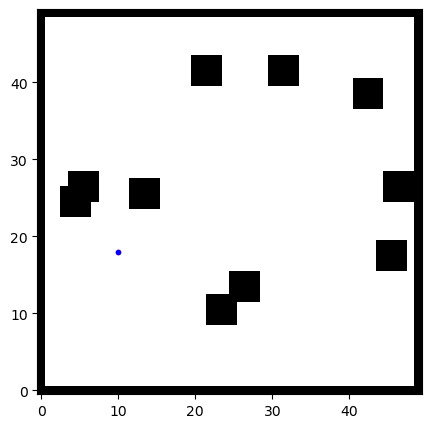

phi -1.1415926535897931
degree -65.40844097383535
(10, 17)
0.0


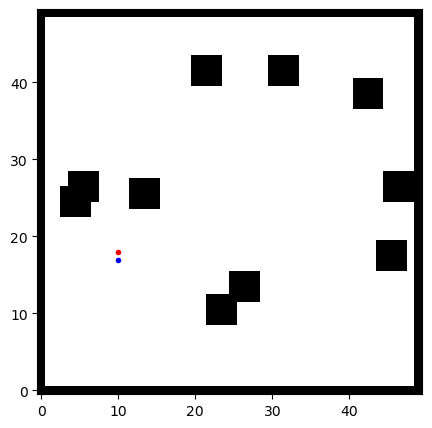

phi -1.1415926535897931
degree -65.40844097383535
(11, 16)
0.0


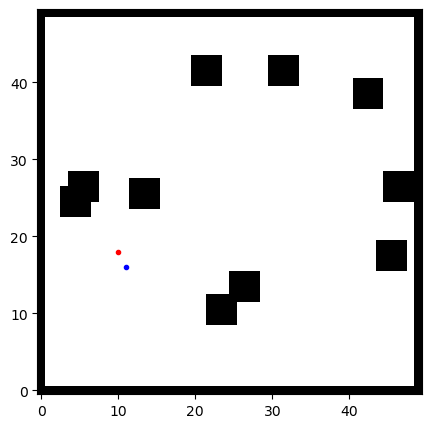

phi -1.1415926535897931
degree -65.40844097383535
(11, 15)
0.0


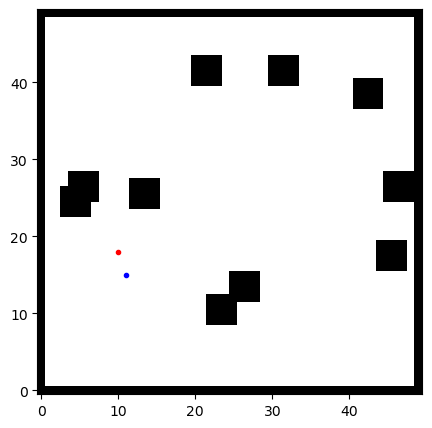

phi -1.1415926535897931
degree -65.40844097383535
(12, 14)
0.0


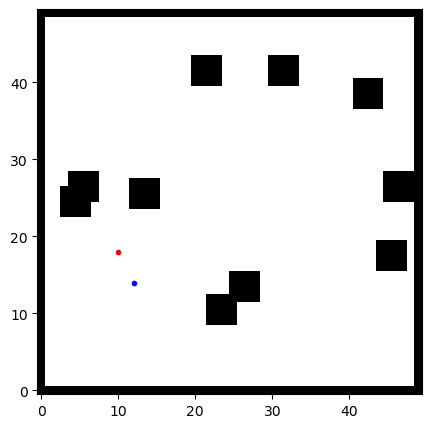

phi -1.1415926535897931
degree -65.40844097383535
(12, 13)
0.0


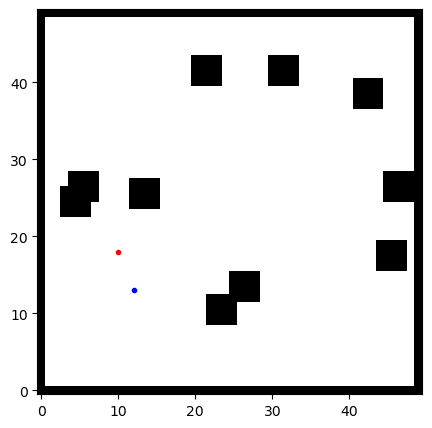

phi -1.1415926535897931
degree -65.40844097383535
(12, 12)
0.0


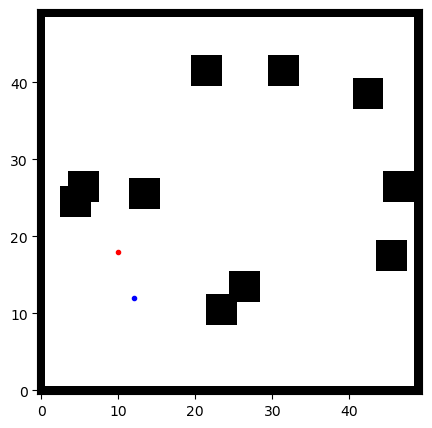

phi -0.6415926535897931
degree -36.76055121729419
(10, 18)
0.0


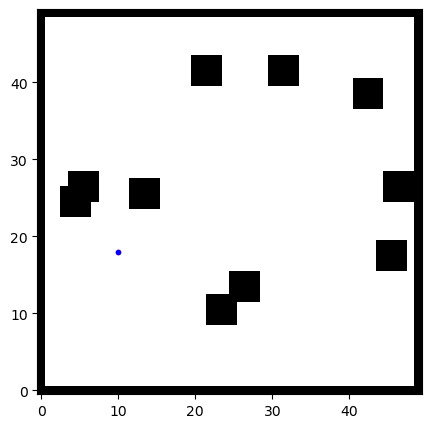

phi -0.6415926535897931
degree -36.76055121729419
(11, 17)
0.0


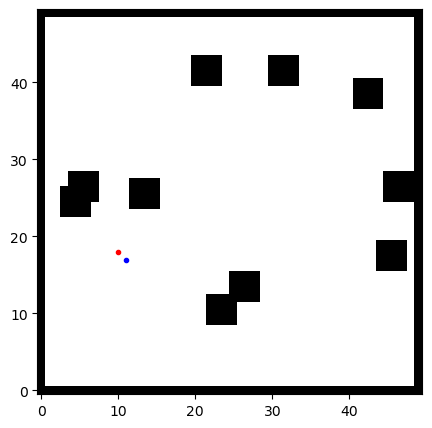

phi -0.6415926535897931
degree -36.76055121729419
(12, 17)
0.0


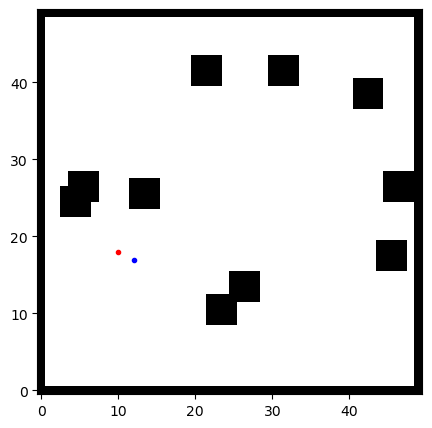

phi -0.6415926535897931
degree -36.76055121729419
(13, 16)
0.0


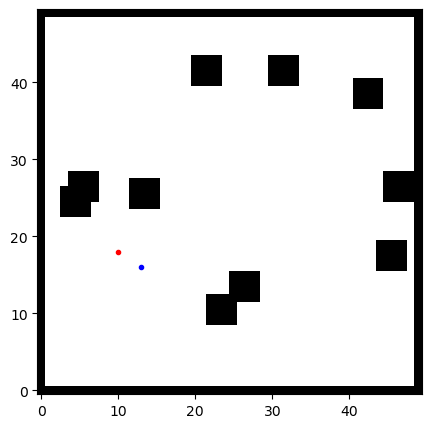

phi -0.6415926535897931
degree -36.76055121729419
(14, 16)
0.0


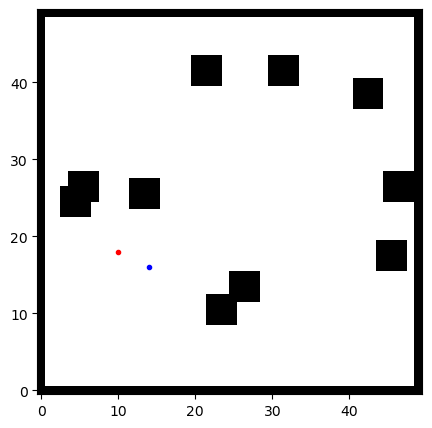

phi -0.6415926535897931
degree -36.76055121729419
(14, 15)
0.0


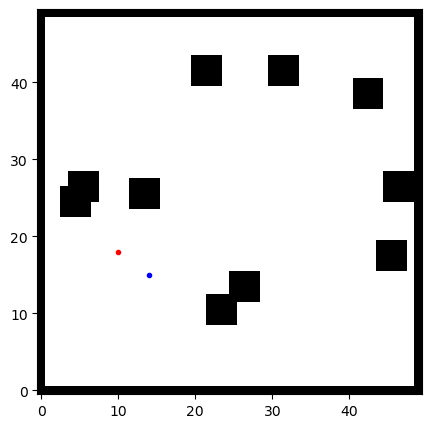

phi -0.6415926535897931
degree -36.76055121729419
(15, 14)
0.0


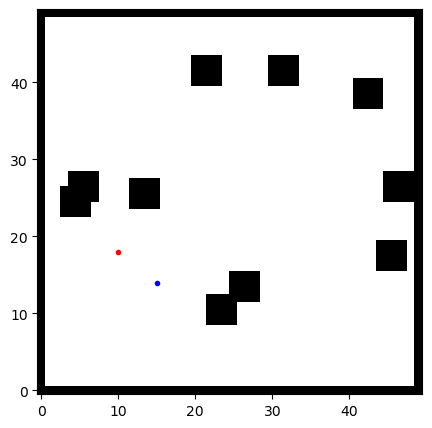

phi -0.14159265358979312
degree -8.112661460753031
(10, 18)
0.0


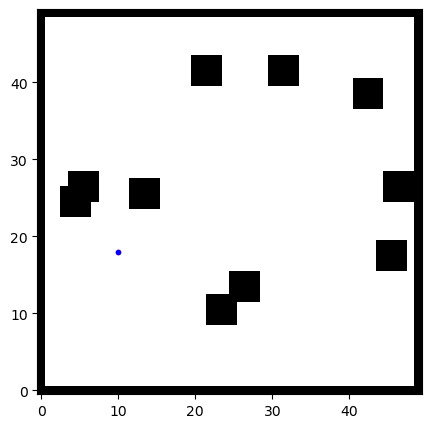

phi -0.14159265358979312
degree -8.112661460753031
(11, 18)
0.0


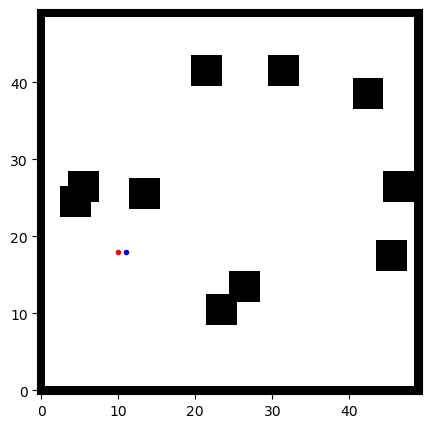

phi -0.14159265358979312
degree -8.112661460753031
(12, 18)
0.0


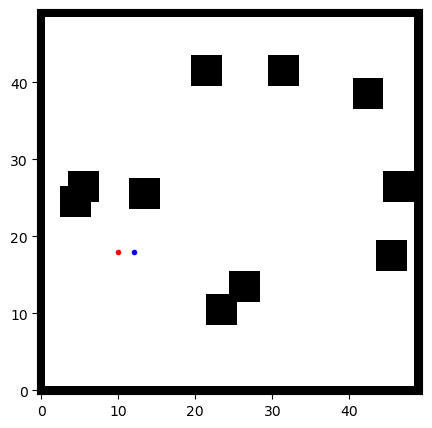

phi -0.14159265358979312
degree -8.112661460753031
(13, 18)
0.0


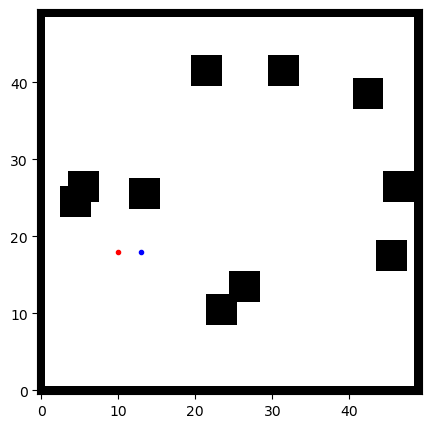

phi -0.14159265358979312
degree -8.112661460753031
(14, 18)
0.0


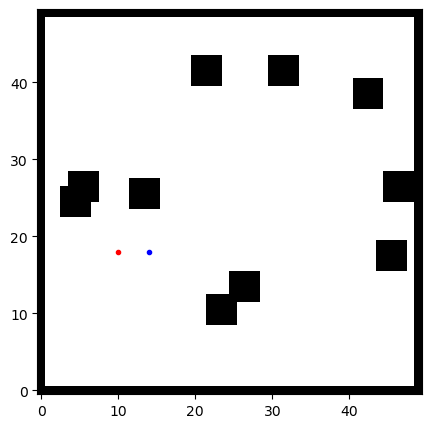

phi -0.14159265358979312
degree -8.112661460753031
(15, 18)
0.0


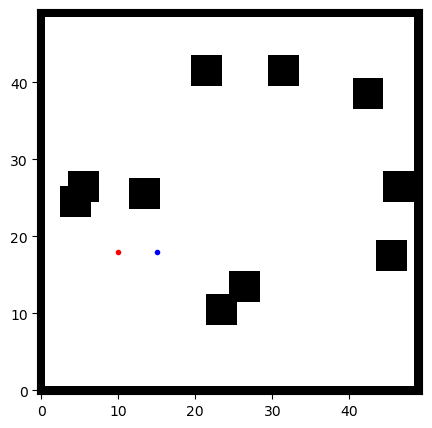

phi -0.14159265358979312
degree -8.112661460753031
(16, 18)
0.0


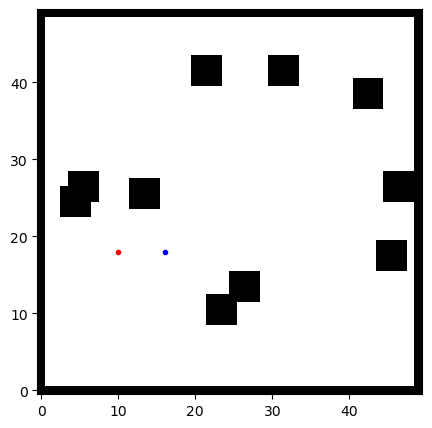

phi 0.3584073464102069
degree 20.53522829578813
(10, 18)
0.0


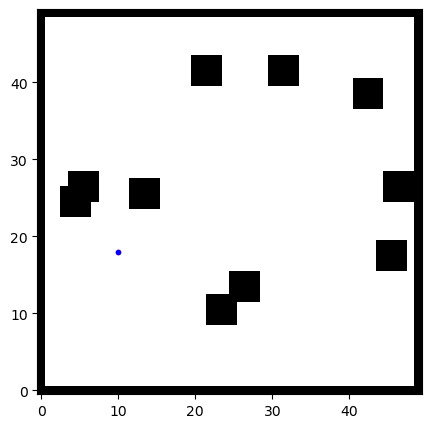

phi 0.3584073464102069
degree 20.53522829578813
(11, 18)
0.0


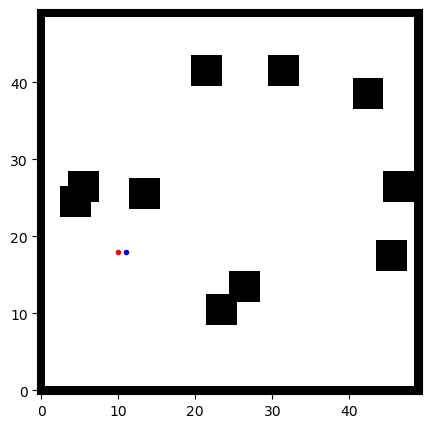

phi 0.3584073464102069
degree 20.53522829578813
(12, 19)
0.0


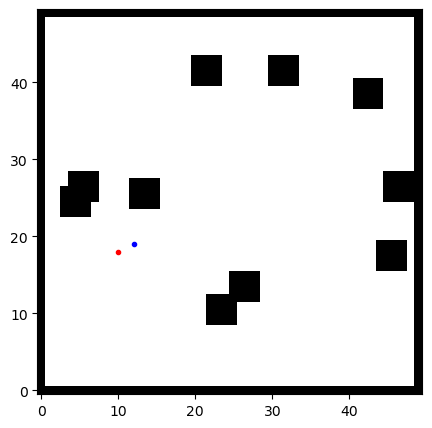

phi 0.3584073464102069
degree 20.53522829578813
(13, 19)
0.0


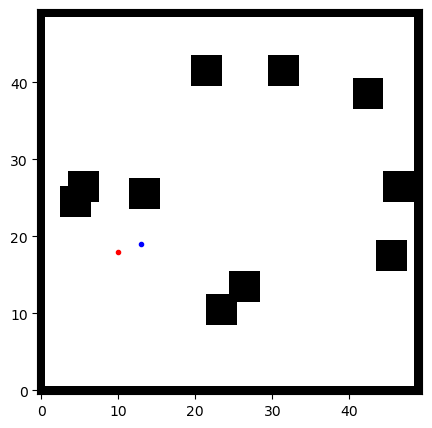

phi 0.3584073464102069
degree 20.53522829578813
(14, 19)
0.0


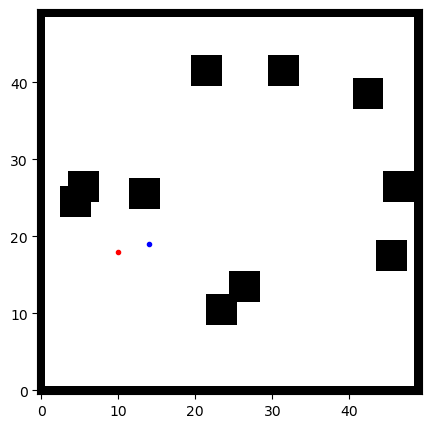

phi 0.3584073464102069
degree 20.53522829578813
(15, 20)
0.0


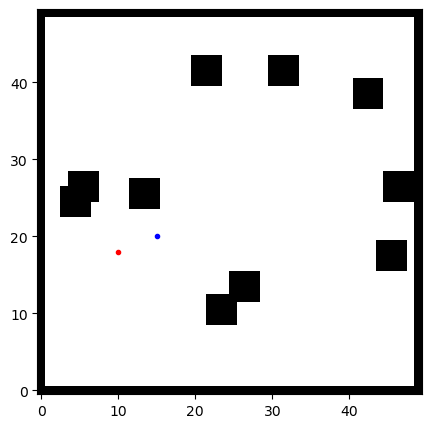

phi 0.3584073464102069
degree 20.53522829578813
(16, 20)
0.0


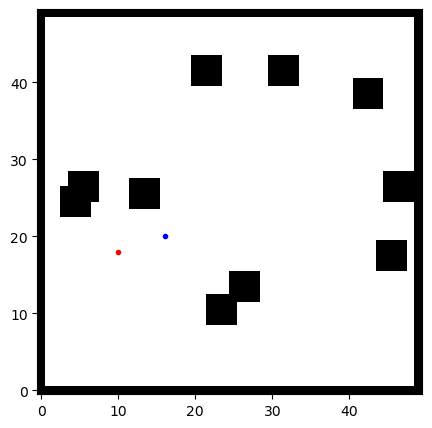

phi 0.8584073464102069
degree 49.18311805232929
(10, 18)
0.0


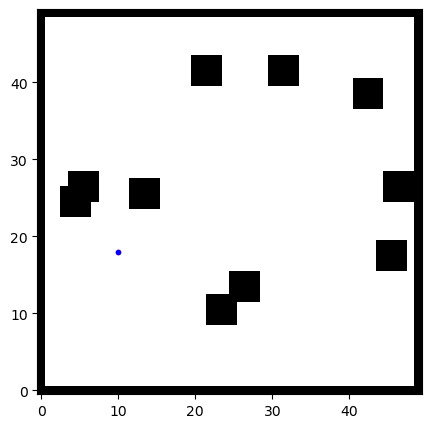

phi 0.8584073464102069
degree 49.18311805232929
(11, 19)
0.0


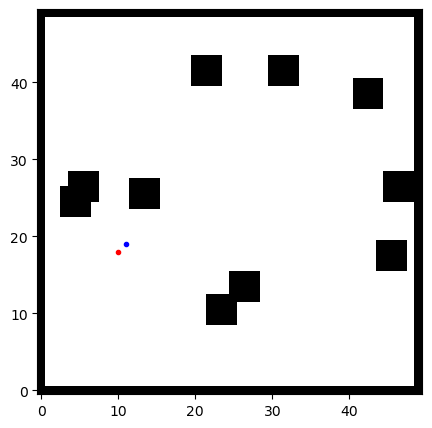

phi 0.8584073464102069
degree 49.18311805232929
(11, 20)
0.0


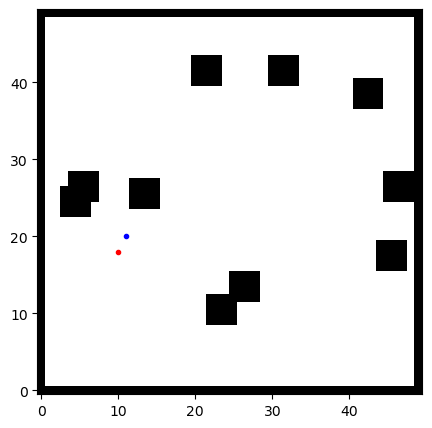

phi 0.8584073464102069
degree 49.18311805232929
(12, 21)
0.0


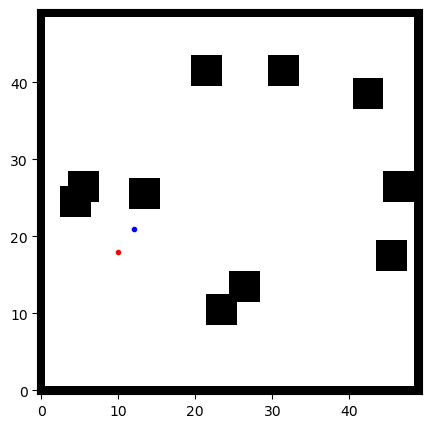

phi 0.8584073464102069
degree 49.18311805232929
(13, 21)
0.0


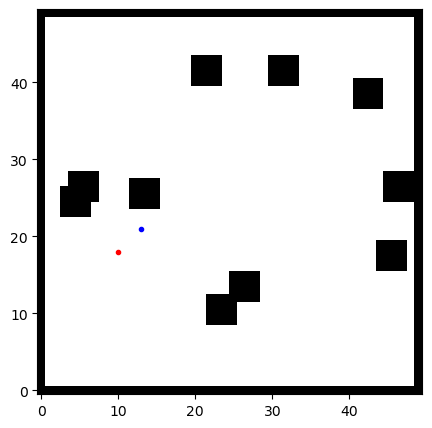

phi 0.8584073464102069
degree 49.18311805232929
(13, 22)
0.0


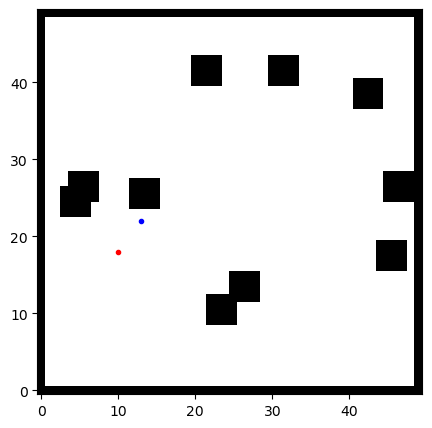

phi 0.8584073464102069
degree 49.18311805232929
(14, 23)
0.0


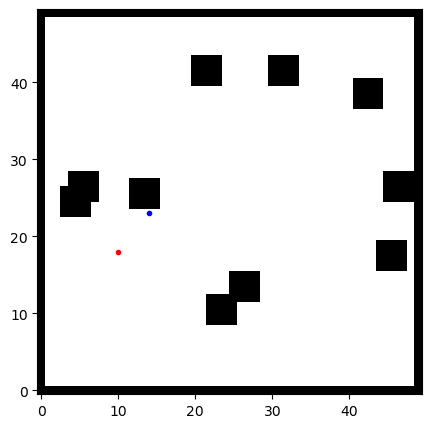

phi 1.3584073464102069
degree 77.83100780887045
(10, 18)
0.0


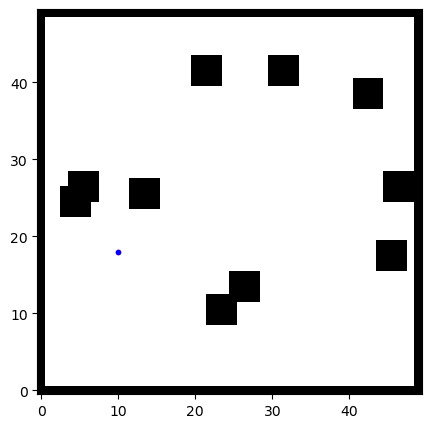

phi 1.3584073464102069
degree 77.83100780887045
(10, 19)
0.0


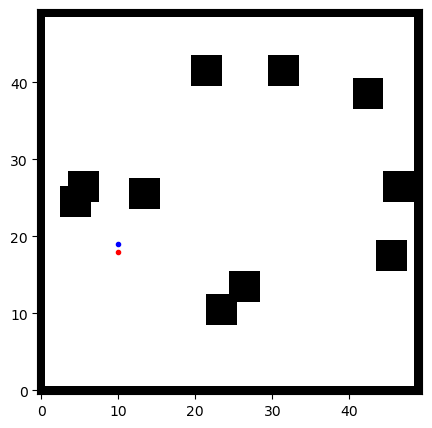

phi 1.3584073464102069
degree 77.83100780887045
(10, 20)
0.0


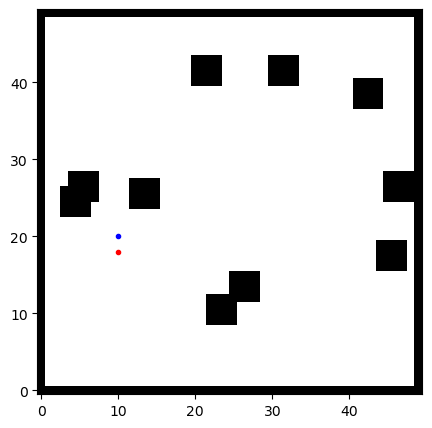

phi 1.3584073464102069
degree 77.83100780887045
(10, 21)
0.0


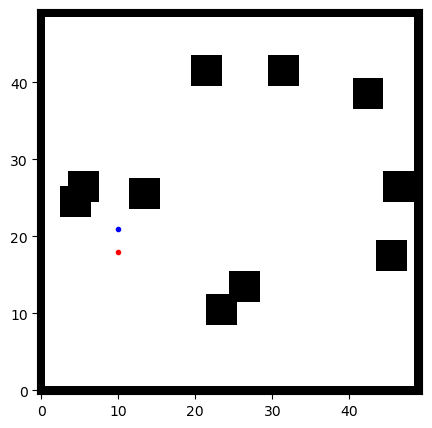

phi 1.3584073464102069
degree 77.83100780887045
(11, 22)
0.0


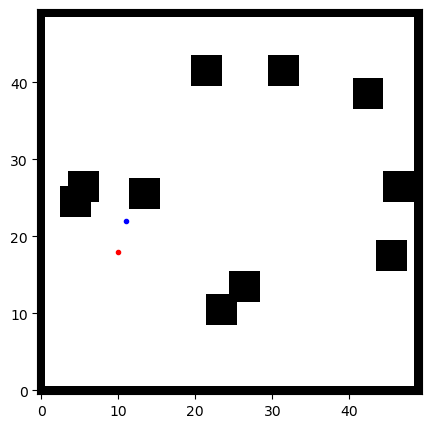

phi 1.3584073464102069
degree 77.83100780887045
(11, 23)
0.0


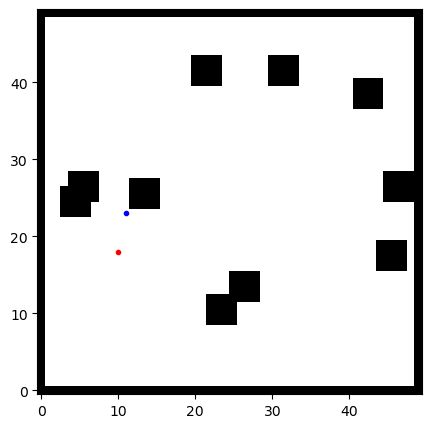

phi 1.3584073464102069
degree 77.83100780887045
(11, 24)
0.0


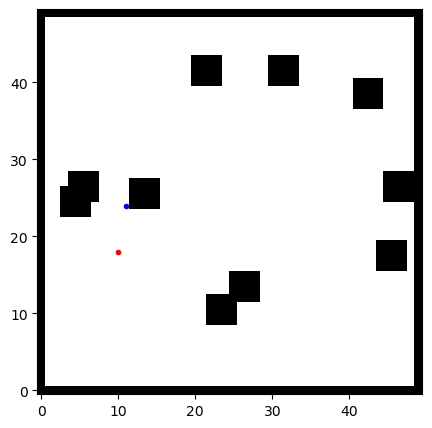

phi 1.8584073464102069
degree 106.47889756541161
(10, 18)
0.0


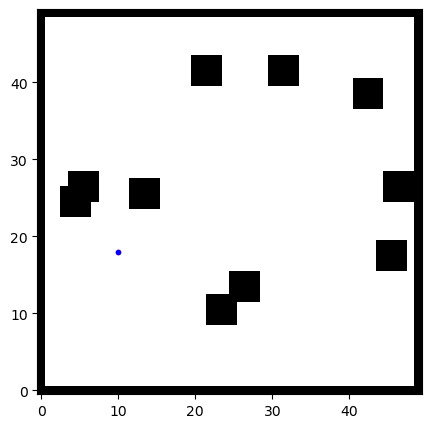

phi 1.8584073464102069
degree 106.47889756541161
(10, 19)
0.0


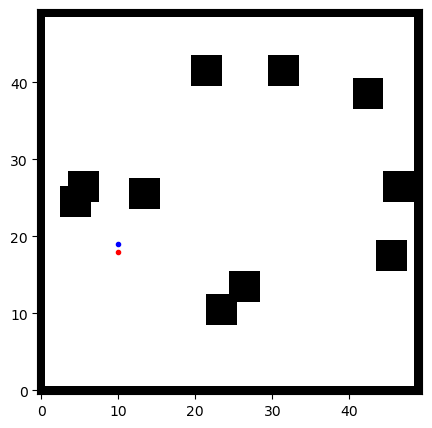

phi 1.8584073464102069
degree 106.47889756541161
(10, 20)
0.0


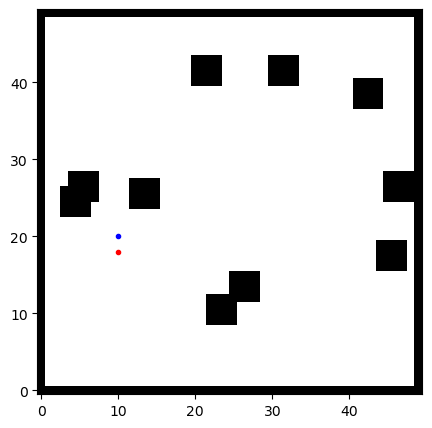

phi 1.8584073464102069
degree 106.47889756541161
(9, 21)
0.0


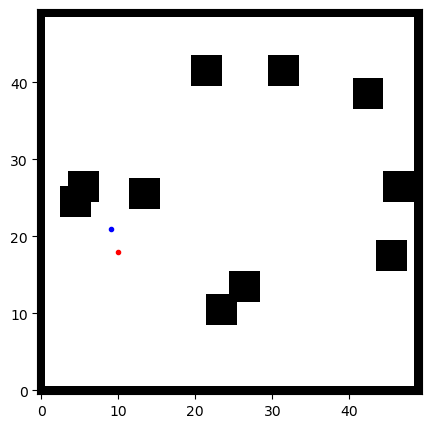

phi 1.8584073464102069
degree 106.47889756541161
(9, 22)
0.0


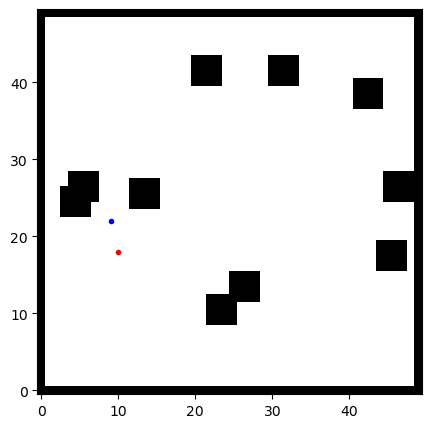

phi 1.8584073464102069
degree 106.47889756541161
(9, 23)
0.0


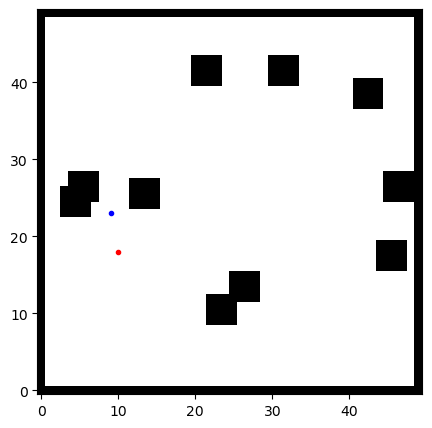

phi 1.8584073464102069
degree 106.47889756541161
(9, 24)
0.0


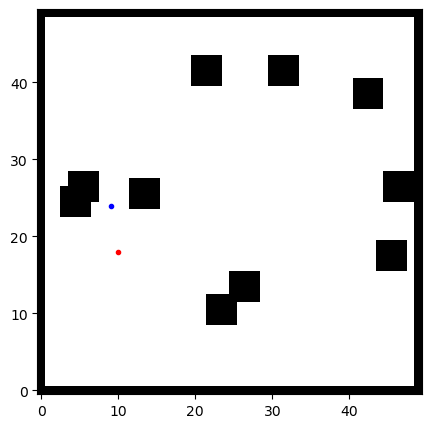

phi 2.358407346410207
degree 135.12678732195278
(10, 18)
0.0


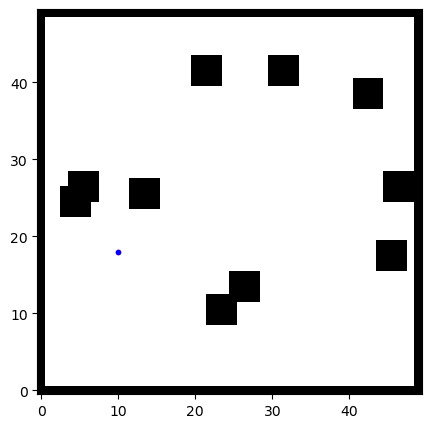

phi 2.358407346410207
degree 135.12678732195278
(9, 19)
0.0


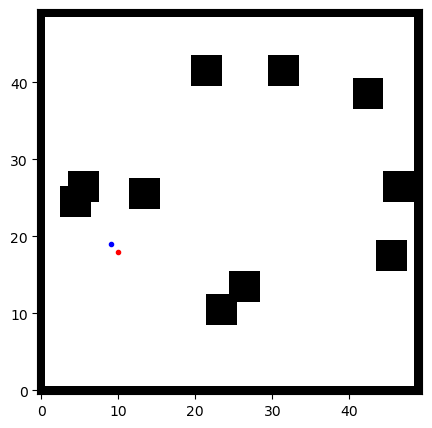

phi 2.358407346410207
degree 135.12678732195278
(8, 20)
0.0


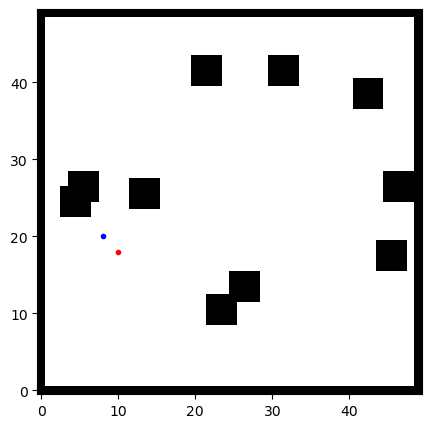

phi 2.358407346410207
degree 135.12678732195278
(8, 20)
0.0


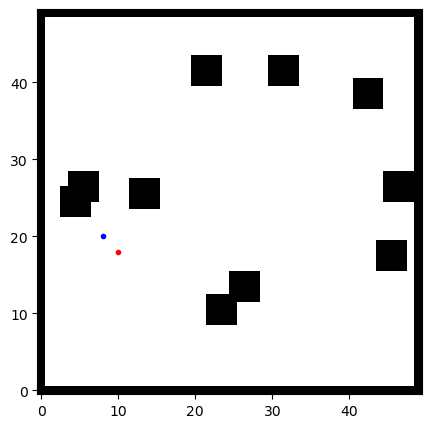

phi 2.358407346410207
degree 135.12678732195278
(7, 21)
0.0


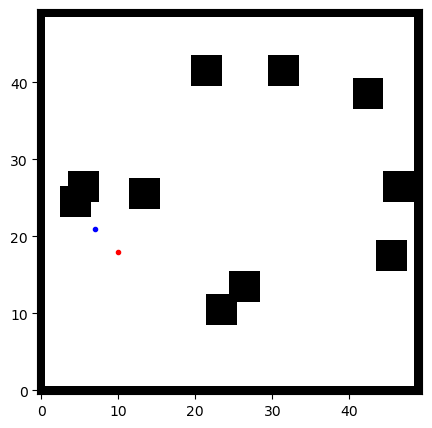

phi 2.358407346410207
degree 135.12678732195278
(6, 22)
0.0


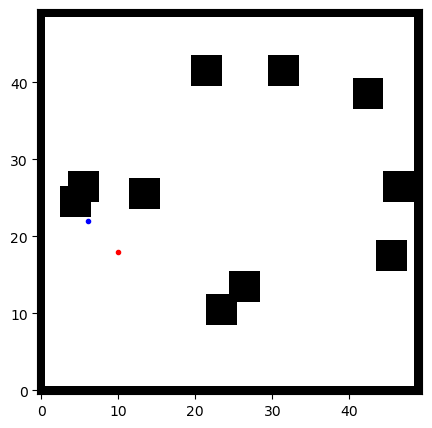

phi 2.358407346410207
degree 135.12678732195278
(6, 22)
0.0


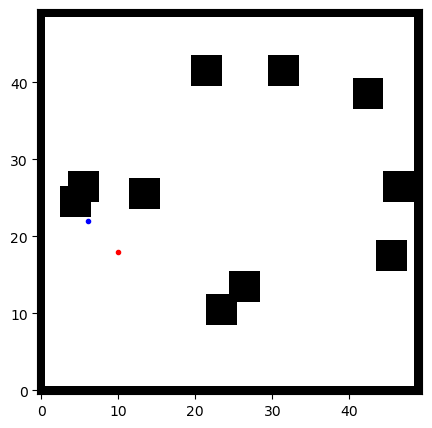

phi 2.858407346410207
degree 163.77467707849394
(10, 18)
0.0


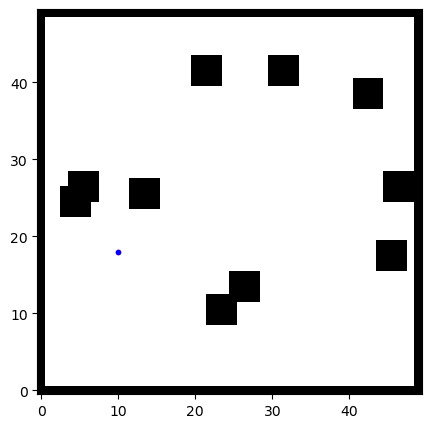

phi 2.858407346410207
degree 163.77467707849394
(9, 18)
0.0


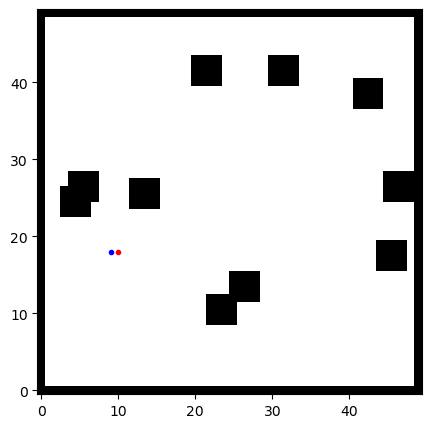

phi 2.858407346410207
degree 163.77467707849394
(8, 18)
0.0


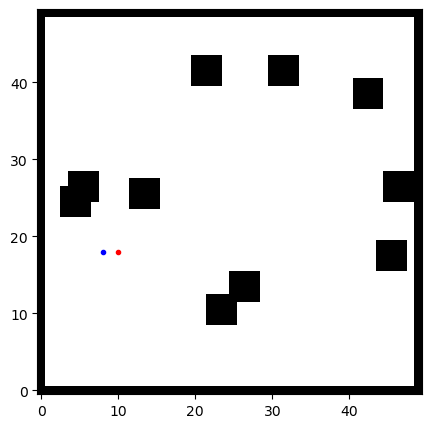

phi 2.858407346410207
degree 163.77467707849394
(7, 19)
0.0


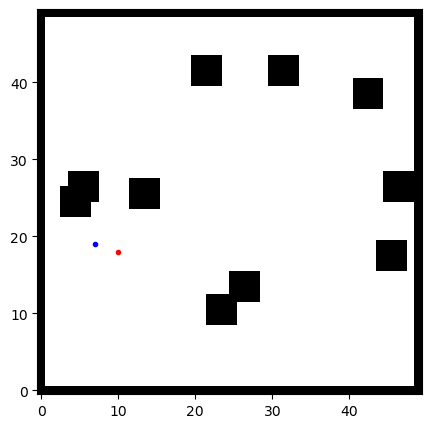

phi 2.858407346410207
degree 163.77467707849394
(6, 19)
0.0


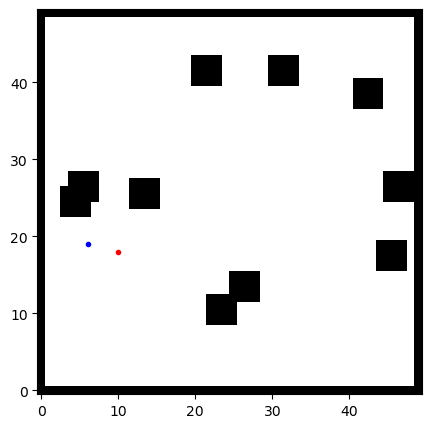

phi 2.858407346410207
degree 163.77467707849394
(5, 19)
0.0


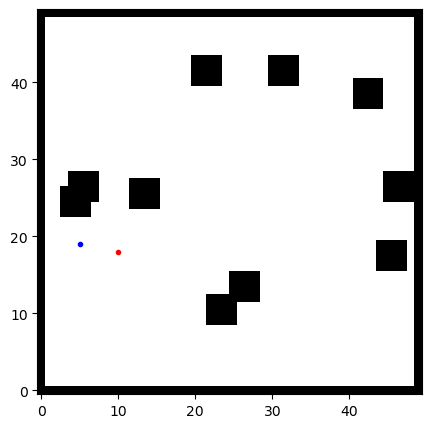

phi 2.858407346410207
degree 163.77467707849394
(4, 19)
0.0


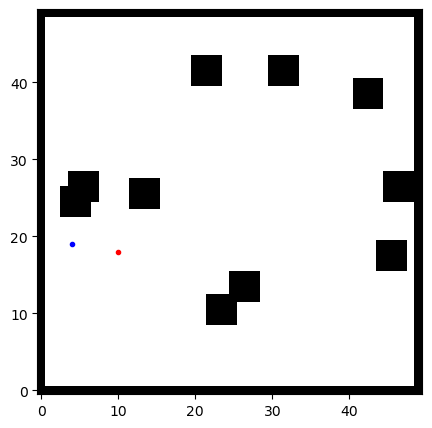

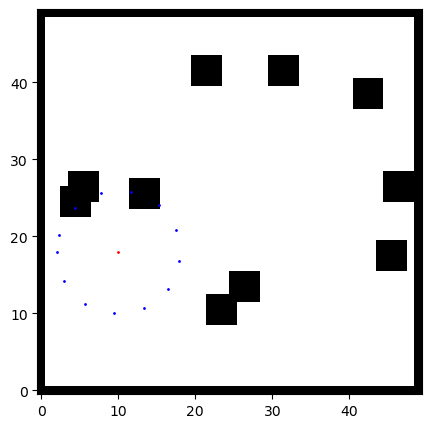

In [14]:
def get_range(map_matrix,robot_position,meas_phi,rmax):
    meas_r = rmax*np.ones(meas_phi.shape)
    height , width = map_matrix.shape 

    for i in range(len(meas_phi)):
        # print(len(meas_phi))
        for r in range(1,rmax):
            x_i = robot_position[1] + (r*np.cos(robot_position[2]+meas_phi[i])).astype(int)
            y_i = robot_position[0] + (r*np.sin(robot_position[2]+meas_phi[i])).astype(int)

            # print("Hi")
            # print("x",x_i)
            # print("y",y_i)
            # print("r",r)
            # print("occupancy",map_matrix[y_i][x_i])
            # print("----------")


            # plt.figure(figsize=(5, 5))
            # plt.imshow(np.subtract(1,map_matrix), cmap='gray', vmin=0, vmax=1,origin='lower')
            # plt.plot(robot_position[1],robot_position[0],'o',color="red",markersize=1)
            # plt.plot(x_i,y_i,'o',color="blue",markersize=2)
            # plt.show()

            if (x_i >= 0) & (x_i < width ) & (y_i >= 0) & (y_i < height):
                print("phi",meas_phi[i])
                print("degree",np.rad2deg(meas_phi[i]))
                print((x_i,y_i))

                print(map_matrix[y_i][x_i])
                plt.figure(figsize=(5, 5))
                plt.imshow(np.subtract(1,map_matrix), cmap='gray', vmin=0, vmax=1,origin='lower')
                plt.plot(robot_position[1],robot_position[0],'o',color="red",markersize=3)
                plt.plot(x_i,y_i,'o',color="blue",markersize=3)
                plt.show()

                if map_matrix[y_i][x_i] == 1:
                    print("we are here buddy!")
                    meas_r[i] = r
                    break
    
    return meas_r



meas_phi = np.arange(-np.pi,np.pi,0.5)

print(map_matrix[15,1])
x_plot =[]
y_plot = [] 
robot_position =[18,10,0]
meas_r = get_range(map_matrix, robot_position, meas_phi, rmax)

for i in range(len(meas_r)):
    x_plot.append(robot_position[1]+meas_r[i]*np.cos(meas_phi[i]))
    y_plot.append(robot_position[0]+meas_r[i]*np.sin(meas_phi[i]))

import matplotlib.pyplot as plt 
plt.figure(figsize=(5, 5))
plt.imshow(np.subtract(1,map_matrix), cmap='gray', vmin=0, vmax=1,origin='lower')
plt.plot(robot_position[1],robot_position[0],'o',color="red",markersize=1)
plt.plot(x_plot,y_plot,'o',color="blue",markersize=1)
plt.show()

# print(meas_phi)      
    

In [15]:
print(meas_phi)
print(meas_r)

[-3.14159265 -2.64159265 -2.14159265 -1.64159265 -1.14159265 -0.64159265
 -0.14159265  0.35840735  0.85840735  1.35840735  1.85840735  2.35840735
  2.85840735]
[8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]


0.0


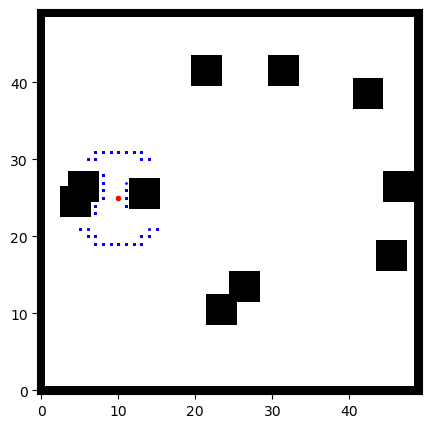

In [33]:
def get_range(map_matrix,robot_position,meas_phi,rmax):
    meas_r = np.ones(meas_phi.shape)
    height , width = map_matrix.shape 

    for i in range(len(meas_phi)):
        for r in range(1,rmax):
            x_i = robot_position[1] + (r*np.cos(robot_position[2]+meas_phi[i])).astype(int)
            y_i = robot_position[0] + (r*np.sin(robot_position[2]+meas_phi[i])).astype(int)
            if (x_i >= 0) & (x_i < width ) & (y_i >= 0) & (y_i < height):
                if map_matrix[y_i,x_i] == 1:
                    break
                meas_r[i] = r
    return meas_r



meas_phi = np.arange(-np.pi,np.pi,0.008)

print(map_matrix[15,1])
x_plot =[]
y_plot = [] 
robot_position =[25,10,0]
meas_r = get_range(map_matrix, robot_position, meas_phi, rmax)



x_i = robot_position[1] + (meas_r*np.cos(robot_position[2]+meas_phi)).astype(int)
y_i = robot_position[0] + (meas_r*np.sin(robot_position[2]+meas_phi)).astype(int)
plt.figure(figsize=(5, 5))
plt.imshow(np.subtract(1,map_matrix), cmap='gray', vmin=0, vmax=1,origin='lower')
plt.plot(robot_position[1],robot_position[0],'o',color="red",markersize=3)
plt.plot(x_i,y_i,'o',color="blue",markersize=1)
plt.show()

# print(meas_phi)      
    